<a href="https://colab.research.google.com/github/habib-wahid/ML-Assignment/blob/main/image_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy

In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Data/CNN_dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall() #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_path="CNN_dataset"
x_train=[]
y_train= []

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder
    print(sub_path)

    if os.path.isdir(sub_path):
      for img in os.listdir(sub_path):
          image_path=sub_path+"/"+img
          img_arr=cv2.imread(image_path)
          img_arr=cv2.resize(img_arr,(32,32))
          x_train.append(img_arr)
          if folder == "HeadCT":
            y_train.append(1)
          if folder == "CXR":
            y_train.append(2)
          if folder == "Hand":
            y_train.append(3)
          if folder == "AbdomenCT":
            y_train.append(4)
          if folder == "ChestCT":
            y_train.append(5)

print(len(x_train))
print(len(y_train))

CNN_dataset/HeadCT
CNN_dataset/ChestCT
CNN_dataset/Hand
CNN_dataset/.DS_Store
CNN_dataset/AbdomenCT
CNN_dataset/CXR
CNN_dataset/README.md
50000
50000


In [20]:
print(x_train[0].shape)

(32, 32, 3)


In [6]:
import numpy

In [21]:
x_train = numpy.array(x_train)
y_train = numpy.array(y_train)

In [9]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [8]:
y_train[10000:10005]

array([5, 5, 5, 5, 5])

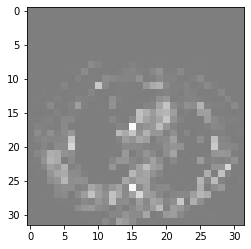

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10000])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, random_state=0, train_size = .75)

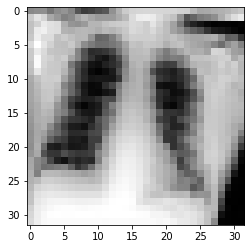

In [13]:
plt.imshow(X_train[10000])

In [14]:
X_train = X_train/255

In [15]:
X_test = X_test/255

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1172/1172 [==============================] - 103s 87ms/step - loss: 0.2017 - accuracy: 0.9396
Epoch 2/5
1172/1172 [==============================] - 98s 84ms/step - loss: 0.0714 - accuracy: 0.9829
Epoch 3/5
1172/1172 [==============================] - 102s 87ms/step - loss: 0.0448 - accuracy: 0.9888
Epoch 4/5
1172/1172 [==============================] - 100s 85ms/step - loss: 0.0323 - accuracy: 0.9933
Epoch 5/5
1172/1172 [==============================] - 101s 86ms/step - loss: 0.0247 - accuracy: 0.9953


In [17]:
# Define the architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1172/1172 [==============================] - 57s 48ms/step - loss: 0.1066 - accuracy: 0.9662 - val_loss: 0.0117 - val_accuracy: 0.9975
Epoch 2/10
1172/1172 [==============================] - 52s 45ms/step - loss: 0.0156 - accuracy: 0.9958 - val_loss: 0.0102 - val_accuracy: 0.9973
Epoch 3/10
1172/1172 [==============================] - 53s 45ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 4/10
1172/1172 [==============================] - 55s 47ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.0132 - val_accuracy: 0.9962
Epoch 5/10
1172/1172 [==============================] - 51s 44ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0071 - val_accuracy: 0.9985
Epoch 6/10
1172/1172 [==============================] - 52s 45ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0031 - val_accuracy: 0.9988
Epoch 7/10
1172/1172 [==============================] - 53s 45ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0057 -